In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import math

In [166]:
X = np.array([58, 62, 60, 64, 67, 70])
y = np.array([60, 60, 58, 60, 70, 72])

In [167]:
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta
bias,theta=initialize(1)
print(bias,theta)

0.5833068354600665 [0.90034911]


In [168]:
def predict(b, theta, x):
    return b + theta*x
y_hat=predict(bias,theta,x)

In [169]:
def get_cost(y,y_hat):
    not_y=y-y_hat
    return np.sum(not_y**2)/len(y)

In [170]:
def update_theta(x, y, y_hat, b_0, theta_o, learning_rate):
    db = (np.sum(y_hat - y) * 2) / len(y)
    dw = (np.dot((y_hat - y), x) * 2) / len(y)
    b_1 = b_0 - learning_rate * db
    theta_1 = theta_o - learning_rate * dw
    return b_1, theta_1

Final Estimate of b and theta: 0.5842667162100902 [0.94587688 0.52756516 0.58929625 1.37181871 1.32633006 1.04555718]


/tmp/ipykernel_5316/1697859717.py:5: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(df['iteration'], df['cost'], 3)


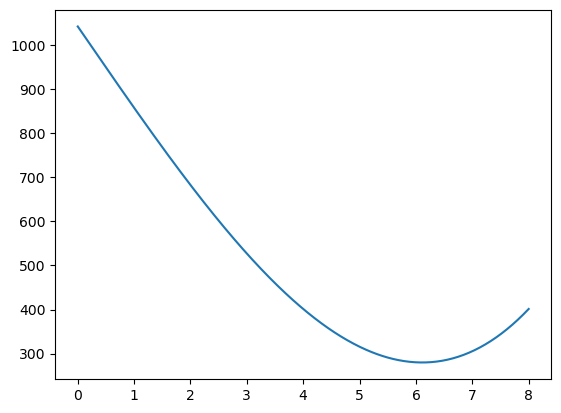

In [171]:
def run_gradient_descent(X, Y, alpha, num_iterations):
    b, theta = initialize(len(X))
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost'])
    result_idx = 0
    
    for each_iter in range(num_iterations):
        Y_hat = predict(b, theta, X)
        this_cost = get_cost(Y, Y_hat)
        
        prev_b = b
        prev_theta = theta
        
        b, theta = update_theta(X, Y, Y_hat, prev_b, prev_theta, alpha)
        
        if each_iter % 4== 0:
            gd_iterations_df.loc[result_idx] = [each_iter, this_cost]
            result_idx += 1
    
    print("Final Estimate of b and theta:", b, theta)
    return gd_iterations_df, b, theta
gd_iterations_df,b, theta = run_gradient_descent(X, y, alpha=0.0001, num_iterations=10)
plot_smooth_curve(gd_iterations_df, "alpha=0.001")

Final Estimate of b and theta: 0.5786528778742526 [1.26785101 0.94003123 1.23326785 1.06384596 0.70194254 0.8576805 ]
Final Estimate of b and theta: 0.5646558049536953 [0.54268685 1.23901151 0.60907624 1.45376043 0.66894524 1.28497886]


/tmp/ipykernel_5316/1697859717.py:5: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(df['iteration'], df['cost'], 3)
/tmp/ipykernel_5316/1697859717.py:5: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(df['iteration'], df['cost'], 3)


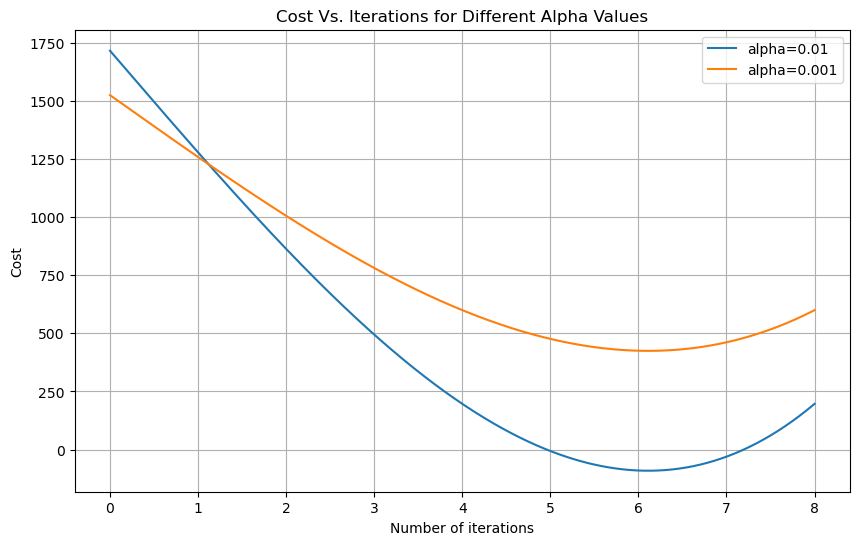

In [172]:
alpha_df_1, b, theta = run_gradient_descent(X, y, alpha=0.0001, num_iterations=10)
alpha_df_2, b, theta = run_gradient_descent(X, y, alpha=0.0001, num_iterations=10)
plt.figure(figsize=(10, 6))
def plot_smooth_curve(df, label):
    coeffs = np.polyfit(df['iteration'], df['cost'], 3)
    poly = np.poly1d(coeffs)
    x_range = np.linspace(df['iteration'].min(), df['iteration'].max(), 500)
    y_smooth = poly(x_range)
    plt.plot(x_range, y_smooth, label=label)
plot_smooth_curve(alpha_df_1, "alpha=0.01")
plot_smooth_curve(alpha_df_2, "alpha=0.001")
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost Vs. Iterations for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()
